In [0]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

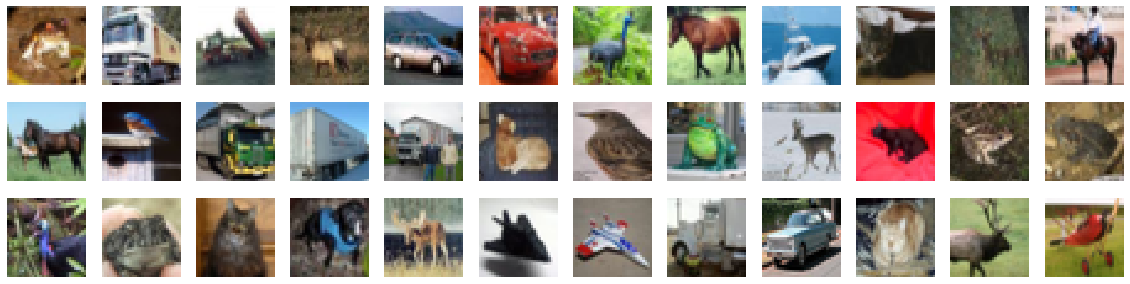

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

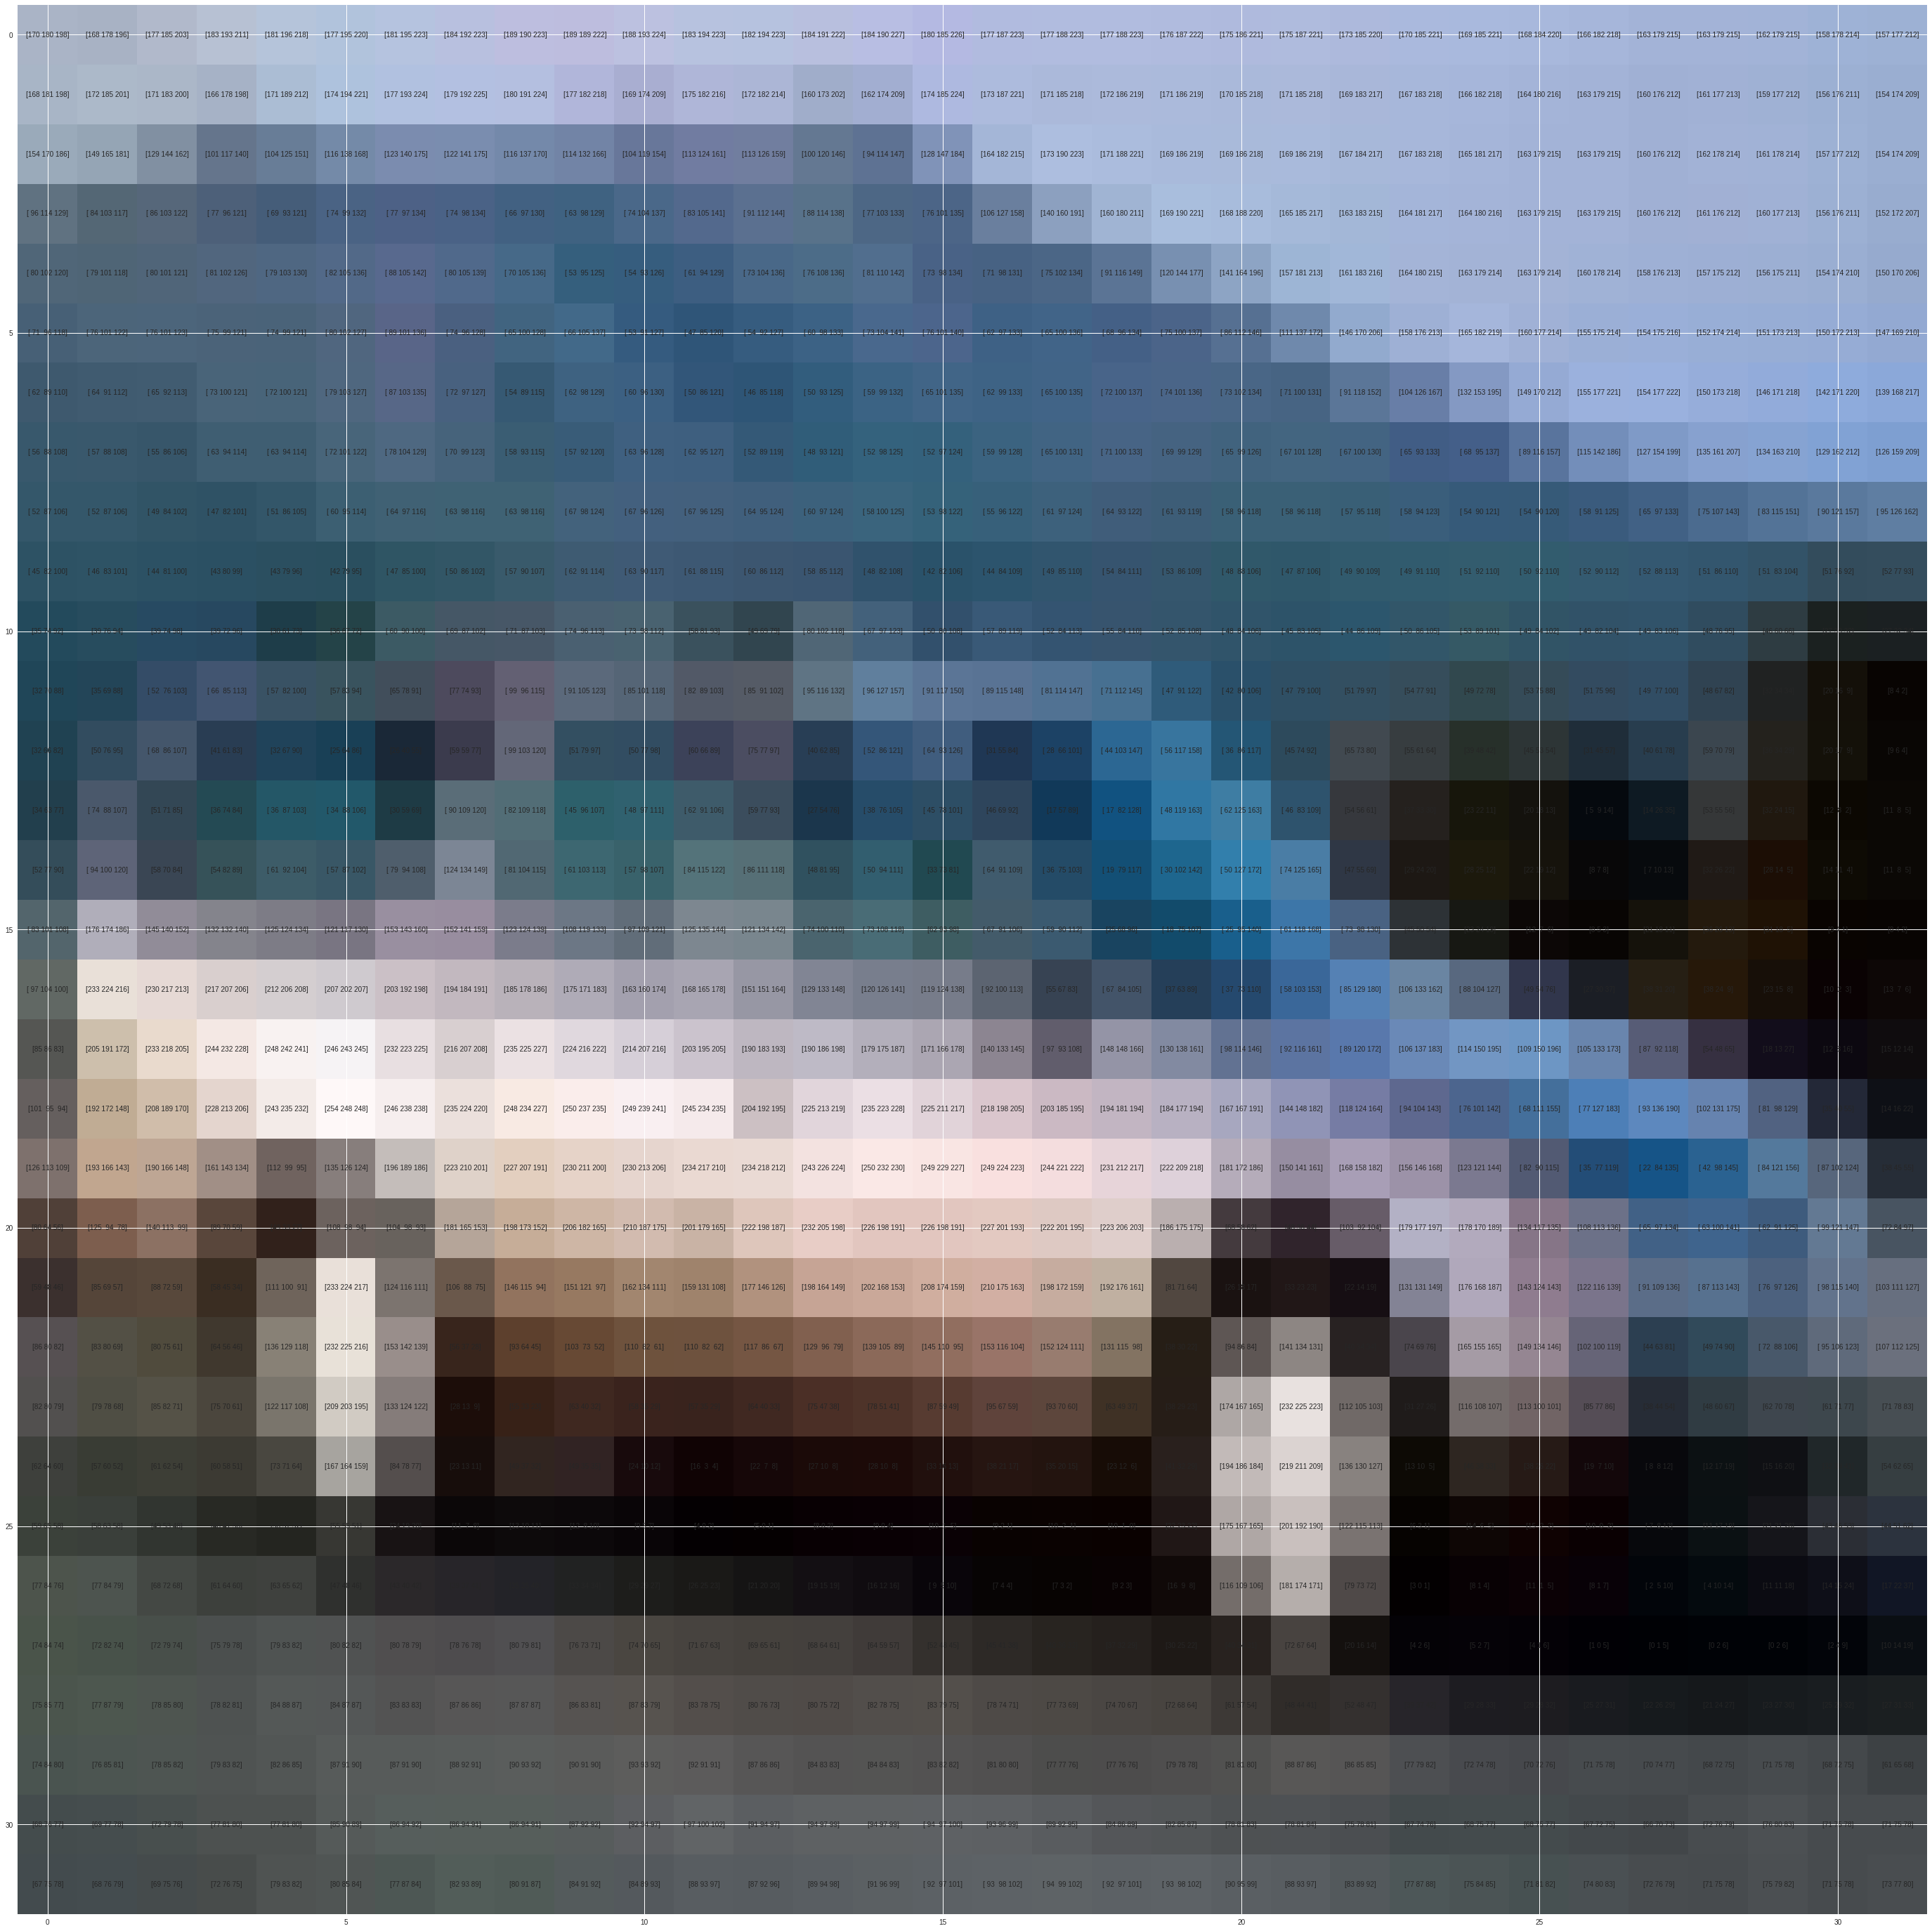

In [4]:
import numpy as np
def visualize_input(img, ax):
    ax.imshow(img)
    width, height, channels = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(np.round(img[x][y],1)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center')
                        #color='white' if img[x][y][1]<thresh else 'black')

fig = plt.figure(figsize = (50,50)) 
ax = fig.add_subplot(111)
visualize_input(x_train[4], ax)

In [0]:
x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

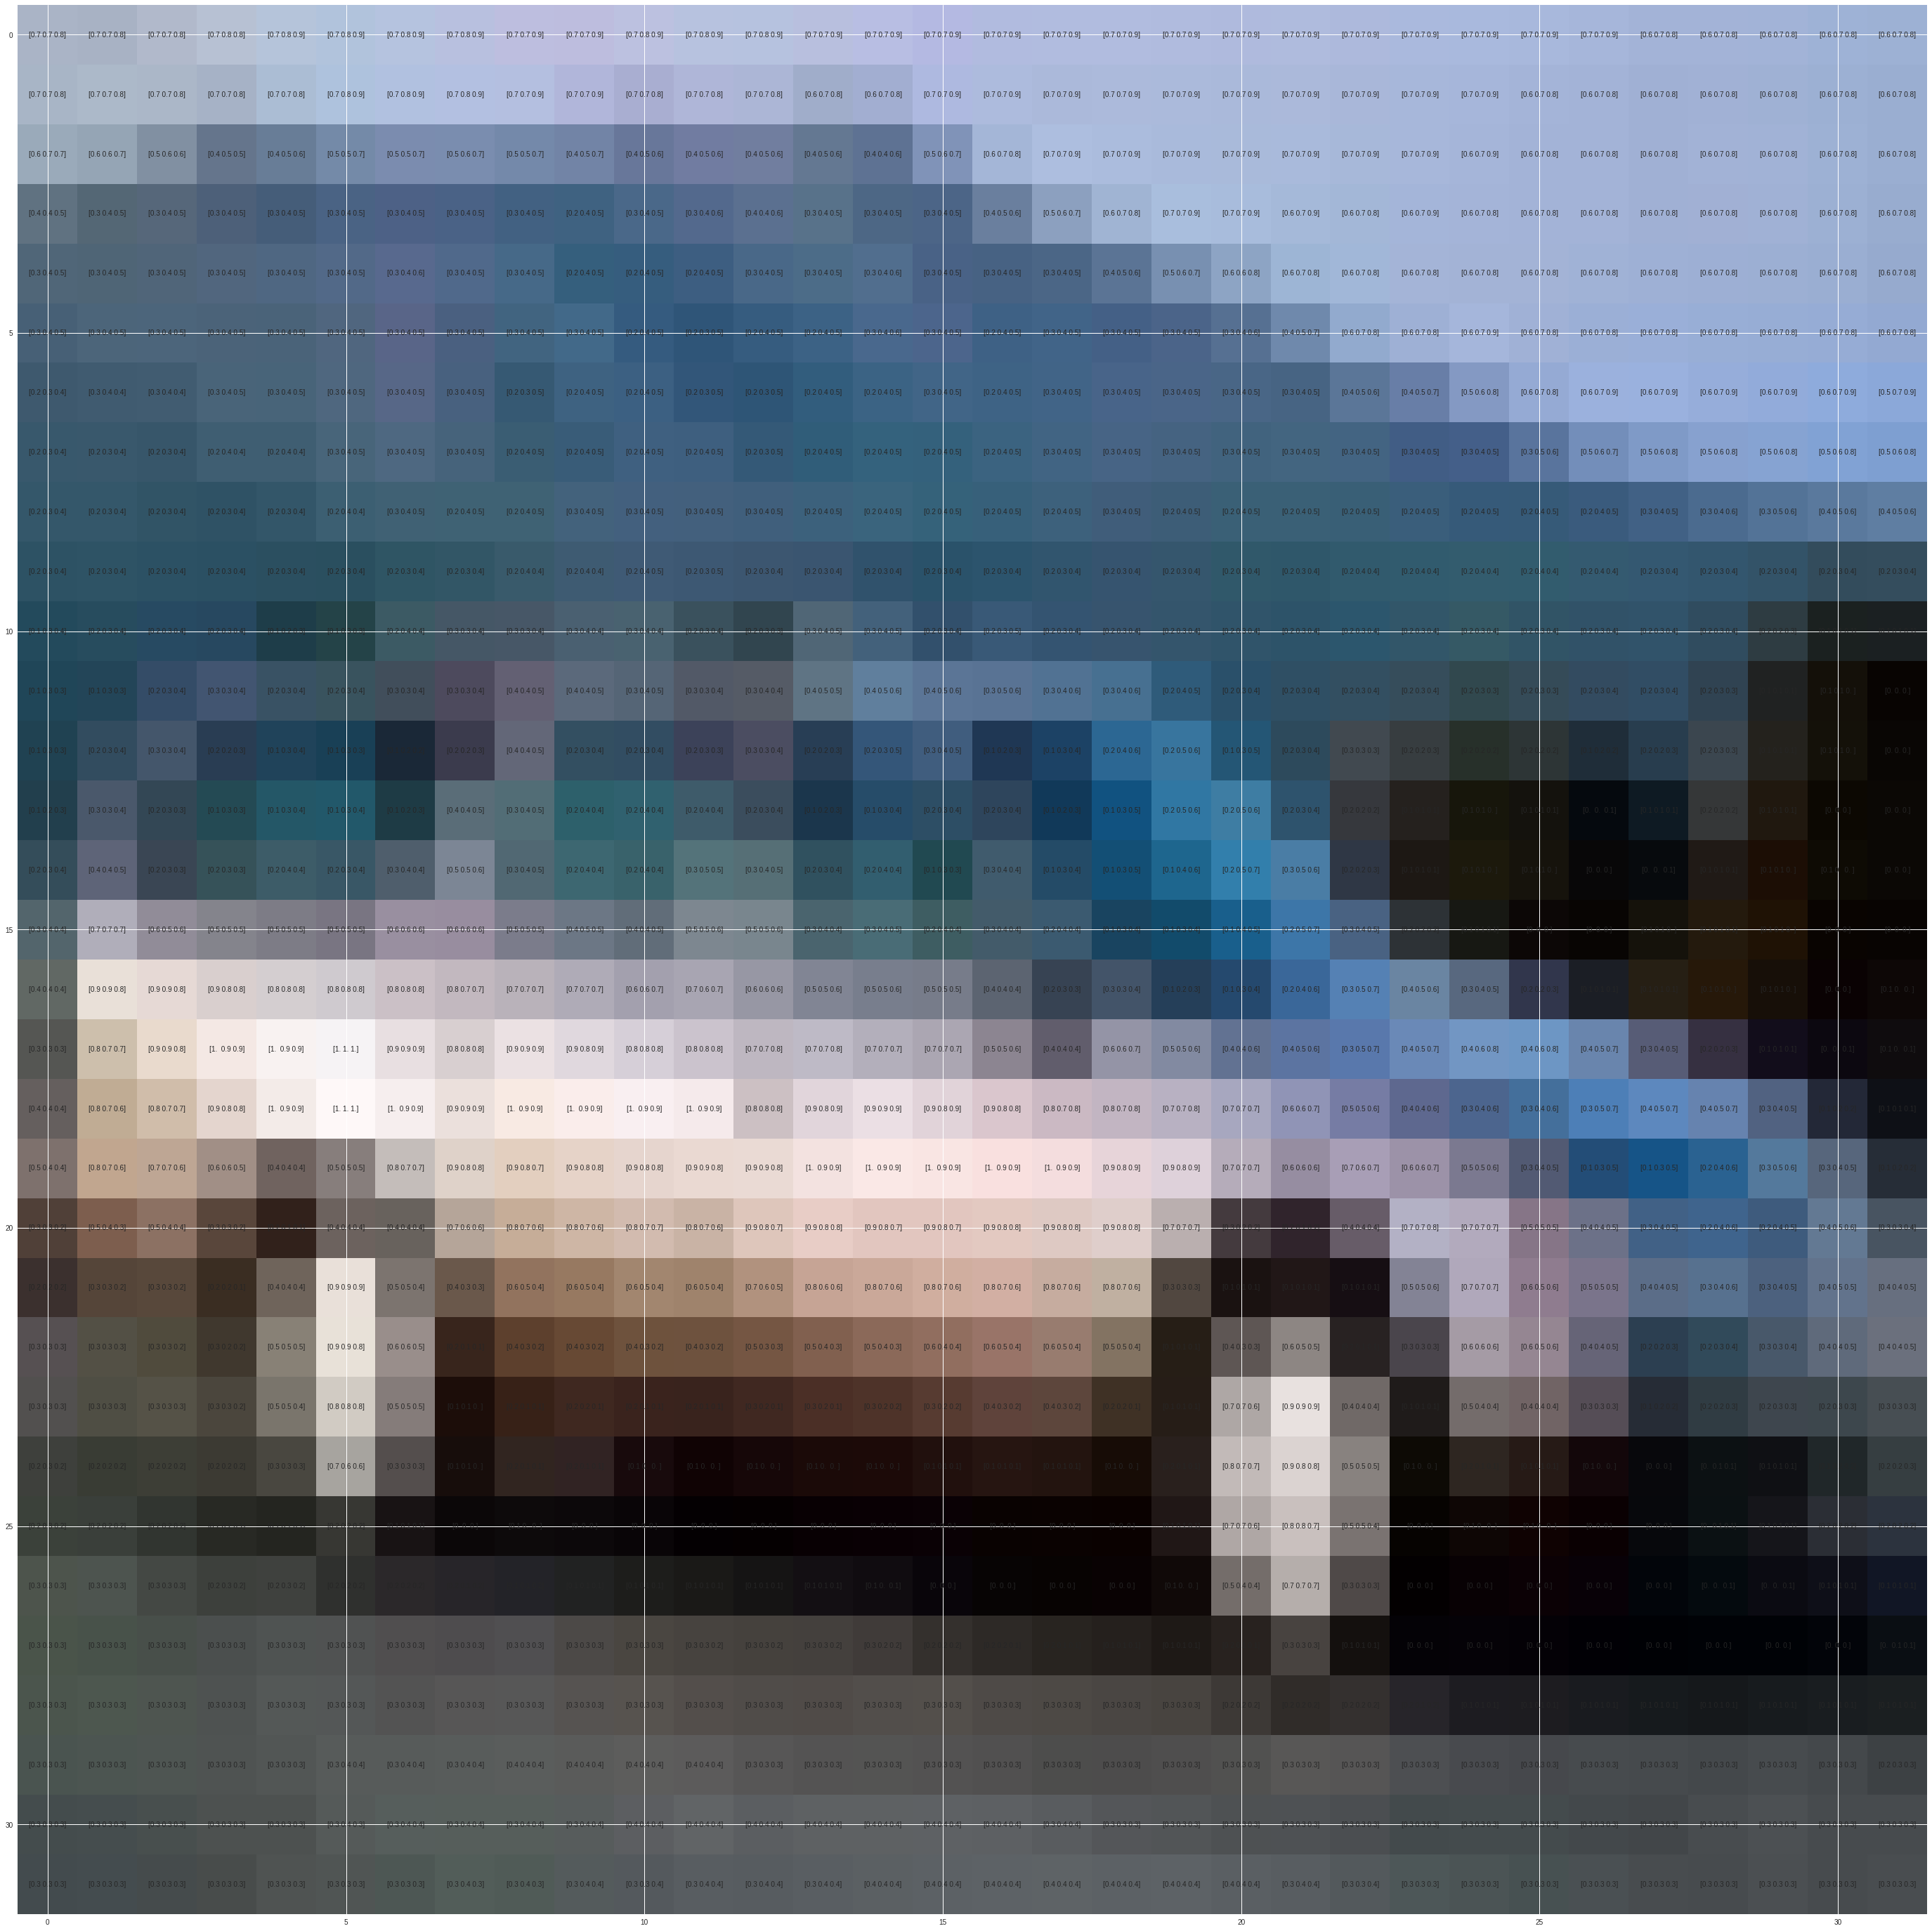

In [6]:
fig = plt.figure(figsize = (50,50)) 
ax = fig.add_subplot(111)
visualize_input(x_train[4], ax)

In [7]:
from keras.utils import np_utils

#one-hot-encode labels
num_classes = len(np.unique(y_train))
print ("Num classes: ", num_classes)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Num classes:  10


In [8]:
x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

# Training shapes
print("x_train shape: ", x_train.shape)

# Number of samples
print("x_train size: ", x_train.shape[0])
print("x_test size: ", x_test.shape[0])
print("x_valid size: ", x_valid.shape[0])

x_train shape:  (45000, 32, 32, 3)
x_train size:  45000
x_test size:  10000
x_valid size:  5000


In [9]:
# Plain old MLP / Neural Net

from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20, 
                 validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                 verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 15s - loss: 2.0850 - acc: 0.2602 - val_loss: 1.9499 - val_acc: 0.2716

Epoch 00001: val_loss improved from inf to 1.94993, saving model to MLP.weights.best.hdf5
Epoch 2/20
 - 15s - loss: 1.8780 - acc: 0.3217 - val_loss: 1.8850 - val_acc: 0.3092

Epoch 00002: val_loss improved from 1.94993 to 1.88499, saving model to MLP.weights.best.hdf5
Epoch 3/20
 - 14s - loss: 1.8497 - acc: 0.3378 - val_loss: 1.8100 - val_acc: 0.3412

Epoch 00003: val_loss improved from 1.88499 to 1.81004, saving model to MLP.weights.best.hdf5
Epoch 4/20
 - 15s - loss: 1.8309 - acc: 0.3496 - val_loss: 1.7828 - val_acc: 0.3516

Epoch 00004: val_loss improved from 1.81004 to 1.78282, saving model to MLP.weights.best.hdf5
Epoch 5/20
 - 15s - loss: 1.8260 - acc: 0.3483 - val_loss: 1.7756 - val_acc: 0.3742

Epoch 00005: val_loss improved from 1.78282 to 1.77557, saving model to MLP.weights.best.hdf5
Epoch 6/20
 - 15s - loss: 1.8159 - acc: 0.3548 - val_loss: 1

In [0]:
model.load_weights('MLP.weights.best.hdf5')

In [13]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy: ", score[1])

10000/10000 [==============================] - 1s 130us/step
Test Accuracy:  0.3932


In [14]:
# CNN Approach

from keras.layers import Convolution2D, MaxPooling2D

modelCNN = Sequential()
modelCNN.add(Convolution2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
modelCNN.add(MaxPooling2D(pool_size=2))
modelCNN.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=2))
modelCNN.add(Convolution2D(filters=64, kernel_size=2, padding='same', activation='relu'))
modelCNN.add(MaxPooling2D(pool_size=2))
modelCNN.add(Dropout(0.3))
modelCNN.add(Flatten())
modelCNN.add(Dense(500, activation='relu'))
modelCNN.add(Dropout(0.4))
modelCNN.add(Dense(num_classes, activation='softmax'))

modelCNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 64)          0         
__________

In [15]:
modelCNN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5.CNNmodel', verbose=1, save_best_only=True)
histCNN = modelCNN.fit(x_train, y_train, batch_size=32, epochs=20, 
                 validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                 verbose=2, shuffle=True)
modelCNN.load_weights('MLP.weights.best.hdf5.CNNmodel')

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 15s - loss: 1.5911 - acc: 0.4244 - val_loss: 1.2969 - val_acc: 0.5350

Epoch 00001: val_loss improved from inf to 1.29691, saving model to MLP.weights.best.hdf5.CNNmodel
Epoch 2/20
 - 14s - loss: 1.2904 - acc: 0.5373 - val_loss: 1.1506 - val_acc: 0.5906

Epoch 00002: val_loss improved from 1.29691 to 1.15064, saving model to MLP.weights.best.hdf5.CNNmodel
Epoch 3/20
 - 14s - loss: 1.1700 - acc: 0.5858 - val_loss: 1.0473 - val_acc: 0.6208

Epoch 00003: val_loss improved from 1.15064 to 1.04731, saving model to MLP.weights.best.hdf5.CNNmodel
Epoch 4/20
 - 14s - loss: 1.1076 - acc: 0.6145 - val_loss: 1.0564 - val_acc: 0.6304

Epoch 00004: val_loss did not improve from 1.04731
Epoch 5/20
 - 14s - loss: 1.0617 - acc: 0.6316 - val_loss: 1.3168 - val_acc: 0.5768

Epoch 00005: val_loss did not improve from 1.04731
Epoch 6/20
 - 14s - loss: 1.0396 - acc: 0.6401 - val_loss: 1.1259 - val_acc: 0.6246

Epoch 00006: val_loss did not impr

In [16]:
score = modelCNN.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy: ", score[1])

10000/10000 [==============================] - 1s 135us/step
Test Accuracy:  0.6823


In [18]:
# CNN Approach

from keras.layers import Conv2D, MaxPooling2D

modelCNN2 = Sequential()
modelCNN2.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
modelCNN2.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
modelCNN2.add(MaxPooling2D(pool_size=2))
modelCNN2.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
modelCNN2.add(MaxPooling2D(pool_size=2))
modelCNN2.add(Dropout(0.3))
modelCNN2.add(Flatten())
modelCNN2.add(Dense(500, activation='relu'))
modelCNN2.add(Dropout(0.3))
modelCNN2.add(Dense(1000, activation='relu'))
modelCNN2.add(Dropout(0.3))
modelCNN2.add(Dense(num_classes, activation='softmax'))

modelCNN2.summary()

opt = keras.optimizers.rmsprop(lr=0.0002, decay=1e-6)
modelCNN2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

checkpointer2 = ModelCheckpoint(filepath='MLP.weights.best.hdf5.CNN2model', verbose=1, save_best_only=True)
histCNN = modelCNN2.fit(x_train, y_train, batch_size=32, epochs=50, 
                 validation_data=(x_valid, y_valid), callbacks=[checkpointer2],
                 verbose=2, shuffle=True)
modelCNN2.load_weights('MLP.weights.best.hdf5.CNN2model')

score = modelCNN2.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
__________